# Great Lobster! But awful service :-(

<img src="http://i.onionstatic.com/avclub/5336/19/16x9/960.jpg" width=640 height=480/>

We continue to look at recommendation data this homework, but through a very different angle. Instead of trying to answer the question "Which restaurant would I like", we look at more aggregate behavior, trying to learn from different reviewers what exactly a restaurant is good for.

In other words, is the food great? Ambiance Bad? Or are both good? Or bad?

So we need to figure out if a given review contains information about the food, the ambiance or both, and if it is a positive or negative review. Note that reviews might cover both topics, so we need to do this analysis on the level of single sentences.

We do this at the level of individual sentences, in multiple reviews, about a restaurant.

<img src="setup.jpg" width=500 height=300/>

What you will carry out here might be termed a first salvo in such an analysis. It will be a fairly complete salvo, but we shall point out many points of improvement along the road, should you want to pursue a project of this kind.

There are many aspects of the data science process that we will touch on in this homework, and many skills that you will gain some familiarity with.

1. We will use Spark to do a good fraction of our data reduction. This mimics the situation at many companies, where Hadoop/Spark and other such technologies are used to reduce "big" data from many different sources such as logfiles, customer data, etc into features which are ready for machine learning and statistical modeling.
2. We will use simple Natural Language processing techniques to parse sentences, splitting them into nouns and adjectives
3. We will use the unsupervised probabilistic clustering algorithm Latent Dirichlet Allocation, or LDA, to extract topics from the nouns in review text.
4. We will use Naive Bayes Machine Learning to carry out sentiment analysis using adjectives from the review text. This kind of analysis is usually done with external sentiment annotated corpus's such as SentiWordNet, but we hope the calculations will give you an idea of what is involved.
5. We will obtain topic estimation from the LDA and probability estimates for sentences in the review from the above classifier to answer the question: what does this review have to say about topics concerning restaurants
6. We will use somewhat bayesian techniques which fall under the nomenclatures "Hierarchical Model" and "Empirical Bayes" to regularize the above probability estimates.

(image from Annie Hall, from http://www.avclub.com/article/learning-about-love-meatballs-gnocchi-lobsters-and-214971)

This homework is split into two parts. You are looking at the first part `hw5part1.ipynb`. You can run this part on your own machine using Spark. (It was developed on a Mac with Homebrew installed Spark (`brew install apache-spark`). You can also work on it inside of your Vagrant virtual Machine or on AWS. 

Part 2 (`hw5part2.ipynb`) does not need Spark. You can save the data at the end of part 1 and use it in part 2. Of-course if you realize you made a mistake, you will need to go back and run Part 1 again.

IF YOU WORK ON AWS **SHUT DOWN** THE AWS CLUSTER WHEN YOU STOP WORKING for a few hours on the HW! If you just leave the cluster open and then work some more the next day, you will find yourself in a world of financial pain.

## This homework is due Thursday, November 19th 2015, at 11:59PM EST.

We'll grade the last commit you make before the homework deadline. We will be looking for the files `hw5part1.ipynb`, `hw5part2.ipynb`, and `dftouse.csv`.

**Start NOW. This is a long homework.** There is a lot to read, and while there are less computations than on HW4, you are mixing several techniques. Start **NOW** especially to make sure you have Spark working! You might have to try Vagrant, AWS etc to get things running! Labs 8, 9, and 10 will help you. In 9, Bayes2.ipynb has a simple exposition of the Gaussian-Gaussian Bayesian model, while Lab 10 has a worked Naive Bayes example.

#Table of Contents
* [Great Lobster! But awful service :-(](#Great-Lobster!-But-awful-service-:-%28)
	* [This homework is due Thursday, November 19th 2015, at 11:59PM EST.](#This-homework-is-due-Thursday,-November-19th-2015,-at-11:59PM-EST.)
	* [Q1. Using Spark and Natural Language Processing to preprocess the data](#Q1.-Using-Spark-and-Natural-Language-Processing-to-preprocess-the-data)
		* [Setting Python packages and Spark up](#Setting-Python-packages-and-Spark-up)
		* [Reading in the data](#Reading-in-the-data)
		* [Sub-sampling the data](#Sub-sampling-the-data)
			* [1.1 Create a subsampled-dataframe](#1.1-Create-a-subsampled-dataframe)
		* [Creating responses](#Creating-responses)
			* [1.2 Create a `responses` column to classify reviews as positive or negative](#1.2-Create-a-responses-column-to-classify-reviews-as-positive-or-negative)
		* [Natural Language processing](#Natural-Language-processing)
			* [Parsing language](#Parsing-language)
			* [1.3 Run `get_parts` on the `text` column of the dataframe](#1.3-Run-get_parts-on-the-text-column-of-the-dataframe)
	* [2. Getting the nouns and doing LDA](#2.-Getting-the-nouns-and-doing-LDA)
		* [Why LDA on nouns?](#Why-LDA-on-nouns?)
			* [Creating the vocabulary](#Creating-the-vocabulary)
			* [2.1 Create a Corpus in bag of words form](#2.1-Create-a-Corpus-in-bag-of-words-form)
		* [Unsupervised topic extraction with LDA](#Unsupervised-topic-extraction-with-LDA)
			* [2.2 Carry out LDA](#2.2-Carry-out-LDA)
			* [2.3 Interpret the topics you get with LDA](#2.3-Interpret-the-topics-you-get-with-LDA)
	* [3. Supervised sentiment analysis with Naive Bayes](#3.-Supervised-sentiment-analysis-with-Naive-Bayes)
		* [Getting the adjectives](#Getting-the-adjectives)
			* [3.1 Create the vocabulary of adjectives for the Naive Bayes Classifier.](#3.1-Create-the-vocabulary-of-adjectives-for-the-Naive-Bayes-Classifier.)
		* [Get the adjective "features" and responses, training and test sets](#Get-the-adjective-"features"-and-responses,-training-and-test-sets)
			* [Transforming to Bag-Of-Words representation](#Transforming-to-Bag-Of-Words-representation)
		* [Support code to run a Naive Bayes Classifier.](#Support-code-to-run-a-Naive-Bayes-Classifier.)
			* [3.2 Write a custom score function, log-likelihood](#3.2-Write-a-custom-score-function,-log-likelihood)
			* [Cross-Validation](#Cross-Validation)
			* [Calibration of a classifier](#Calibration-of-a-classifier)
			* [3.3 Write a custom cross-validation loop](#3.3-Write-a-custom-cross-validation-loop)
			* [3.4 Test time!](#3.4-Test-time!)
	* [4. Putting topics and sentiment analysis together](#4.-Putting-topics-and-sentiment-analysis-together)
		* [Naive Bayes Probabilities](#Naive-Bayes-Probabilities)
			* [4.1 Obtain log-probabilities for the adjectives](#4.1-Obtain-log-probabilities-for-the-adjectives)
			* [4.2 Write a function to compute the probability that a sentence is positive.](#4.2-Write-a-function-to-compute-the-probability-that-a-sentence-is-positive.)
			* [Compute the topic for a sentence](#Compute-the-topic-for-a-sentence)
			* [Create a dataframe with all of this information](#Create-a-dataframe-with-all-of-this-information)
			* [4.3 Get the stats](#4.3-Get-the-stats)


In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

## Q1. Using Spark and Natural Language Processing to preprocess the data

In this part of the homework you will use Spark to parse the restaurant reviews and extract nouns and adjectives. We will use this data later to create the topics of the reviews and do a sentiment analysis. 

You can use Spark here either on your laptop, directly on the mac, on the Vagrant virtual machine on mac or windows, or on AWS. Lab 8 has all the goods, and hopefully you know what to do by now since you have been going to section.

NOTE: if you are running into memory problems, try removing calls to `.cache()` in Spark. This will ease some memory pressure, at the cost of taking longer to run.

For this part of the homework we will run Spark . You should make sure your virtual machine has at-least 2GB of virtual memory. If you are using AWS, use a medium instance, at the very least.

### Setting Python packages and Spark up

The first thing we have to do is setting up spark. This can be complex, so do this REALLY early on, even if you dont have time to do anything else in the homework early.

You will need to make sure you have 3 packages installed:

- `findspark`: `pip install findspark`.
- `gensim`: for LDA. Use conda for this. `conda install gensim`. DO NOT use pip for this. You will find pain
- `pattern`: for natural language processing, `pip install pattern`.

Notice that below I set the full path to Anaconda python. I need to do this as I usually dont put Anaconda on my path, and thus need to provide the full path in the environment variable `PYSPARK_PYTHON`. If Anaconda is on your path, you probably wont need this. In fact, for some of you it might cause Spark to stop working, so comment it out

In [2]:
import os
os.environ['PYSPARK_PYTHON'] = '//anaconda/bin/python'

The next cell sets up Spark for you. Your exact incantation might be different. You might not need `findspark`. This is what I had to do.

Make sure you are using Spark 1.5.0+ .  On my Mac, I use the JDK (as opposed to the JRE) from Java 8 and Spark 1.5.1.

In [3]:
import findspark
findspark.init()
print findspark.find()
# Depending on your setup you might have to change this line of code
#findspark makes sure I dont need the below on homebrew.
#os.environ['SPARK_HOME']="/usr/local/Cellar/apache-spark/1.5.1/libexec/"
#the below actually broke my spark, so I removed it. 
#Depending on how you started the notebook, you might need it.
#os.environ['PYSPARK_SUBMIT_ARGS']="--master local pyspark --executor-memory 4g"

/usr/local/opt/apache-spark/libexec


Start up the Spark context. This is what starts java up:

In [4]:
import pyspark
conf = (pyspark.SparkConf()
    .setMaster('local')
    .setAppName('pyspark')
    .set("spark.executor.memory", "2g"))
sc = pyspark.SparkContext(conf=conf)

If you started Spark from a terminal or the ipython notebook from a terminal, you will see all kinds of logging information on the terminal. This information will tell you if something is wrong.

We also want to check if the same Python is running on all the child execution processes on your machine/in the cluster. If you did this right the python version printed below from 10 different executors:

In [5]:
import sys
rdd = sc.parallelize(xrange(10),10)
rdd.map(lambda x: sys.version).collect()

['2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]',
 '2.7.10 |Anaconda 2.3.0 (x8

ought tomatch the one here:

In [6]:
sys.version

'2.7.10 |Anaconda 2.3.0 (x86_64)| (default, Oct 19 2015, 18:31:17) \n[GCC 4.2.1 (Apple Inc. build 5577)]'

### Reading in the data

We create a `SQLContext` from our Spark Context so that we can use Spark's dataframe support.

In [7]:
from pyspark.sql import SQLContext
sqlsc=SQLContext(sc)

The file is available at https://s3.amazonaws.com/cs109-2015/restaurants.jsonl or https://dl.dropboxusercontent.com/u/75194/restaurants.jsonl . Download it to your local machine or onto AWS. You might find the command-line (terminal) programs `wget` or `curl` useful. The file is about 900MB large.

We use the SQL Context to read our data file in. The data file is a list of json dictionaries, one per line (thus we gave the file the extension _`.jsonl`_), 
which each correspond to a row in the dataframe.

Copy the file somewhere on your path and read it in like below:

In [8]:
revdf = sqlsc.read.json("/Users/Mike_Laptop/Documents/Harvard/Computer Science/CS109/Homework/albergo08-2015hw/restaurants.jsonl")
revdf.show(5)

+---------------+------------+--------------------+---------------------+----------+--------------------+-----+--------------------+-------------+--------------------+-----------------+
|_corrupt_record|business_avg|         business_id|business_review_count|      date|           review_id|stars|                text|     user_avg|             user_id|user_review_count|
+---------------+------------+--------------------+---------------------+----------+--------------------+-----+--------------------+-------------+--------------------+-----------------+
|           null|         4.7|mVHrayjG3uZ_RLHkL...|                 10.0|2012-12-01|6w6gMZ3iBLGcUM4RB...|    5|This place was DE...|          5.0|LWbYpcangjBMm4KPx...|              1.0|
|           null|         4.7|mVHrayjG3uZ_RLHkL...|                 10.0|2013-03-15|jVVv_DA5mCDB6medi...|    5|Can't miss stop f...|          5.0|m1FpV3EAeggaAdfPx...|              1.0|
|           null|         4.7|mVHrayjG3uZ_RLHkL...|                 10

We look at our data by printing the schema for this table: 
Spark does this this by sampling some rows for all the columns and seeing the type.

In [9]:
#We cache the data to make sure it is only read once from disk
revdf.cache()
print "How many reviews do we have?", revdf.count()
revdf.printSchema()

How many reviews do we have? 940600
root
 |-- _corrupt_record: string (nullable = true)
 |-- business_avg: double (nullable = true)
 |-- business_id: string (nullable = true)
 |-- business_review_count: double (nullable = true)
 |-- date: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: long (nullable = true)
 |-- text: string (nullable = true)
 |-- user_avg: double (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_review_count: double (nullable = true)



We now create a dataframe which has only those restaurants that have more than 10 reviews. The reason to do this is that we'll be gaining information from individual reviews. This information can be quite disparate. And thus we want enough reviews to get some statistically significant middle ground.

At this point you might object: isn't the whole point of reviews and recommendations that users are different, so that middle ground is hard to find. In the last homework even our baseline models took user bias into account. 

Here though our hypothesis is different: we assume that **people will use similar adjectives to describe a good experience, no matter what star rating they give it**. So, we will be ok as long as the definition of "good", "excellent", "poor" takes into account the user bias.

In [10]:
bizcounts=revdf.groupby('business_id').count()
bizids = (bizcounts[bizcounts['count'] > 10]
          .map(lambda r: r.business_id)
          .collect()
          )

In [11]:
print "How many businesses are we left with? ", len(bizids)

How many businesses are we left with?  11417


Notice that the command below creates a new dataframe as dataframes in Spark are immutable. (Remember, in Pandas too, unless we used `inplace=True` we returned a new dataframe from most operations (except queries which returned views)).

In [12]:
revdf_small=revdf[revdf.business_id.isin(bizids)]#creates new dataframe

Now we count how many reviews we have left in total across all restaurants.

In [13]:
print "Number of total reviews: ", revdf_small.count()#actually causes the subselect to happen

Number of total reviews:  905600


Remember RDD operations (Dataframes are just a layer over RDD) are lazy in Spark. So what happens here is that the actual subselection only happens on the `.count()`, at which point the data is cached as well. 

### Sub-sampling the data

As you might have noticed, there are almost a million records in this dataframe. Doing our analysis on such a large dataframe might bust past the java heap space on our individual machines. 

My modus operandi is to always start with a small data set. My code initially tends to almost always be wrong: its much easier to deal with this if you have small datasets. I also like to use functions like `take(5)` in Spark: this gives me a quick sanity check of the output to see if it makes any sense.

#### 1.1 Create a subsampled-dataframe

With this in mind, we'll create a sub-sampled dataframe where we have 8 reviews per restaurant. We create a variable `PER_RESTAURANT_SAMPLES` to store this number.

In [14]:
PER_RESTAURANT_SAMPLES=8

Write code that randomly subsamples `PER_RESTAURANT_SAMPLES` reviews for each restaurant. 

First get a python list of all the review_id's in this smaller sample

In [15]:
#your code here
review_ids_list = []

#define random
def random(x):
    return np.random.choice(list(x),PER_RESTAURANT_SAMPLES,replace=False)

#get review list
revdf_small_bybiz=revdf_small.map(lambda x: (x.business_id, x.review_id)).groupByKey()
revdf_small_random = revdf_small_bybiz.flatMapValues(lambda x: random(x)).collect()

for pair in revdf_small_random:
    review_ids_list.append(pair[1])


Then use this smaller sample and the Spark method `isin` to create a smaller Spark dataframe `subdf`.

In [16]:
#your code here
subdf=revdf_small[revdf_small.review_id.isin(review_ids_list)]

Lets cache the dataframe and see how many reviews we have.

In [17]:
subdf.cache()
subdf.count()

91336

You should have about 91000 reviews.

### Creating responses

#### 1.2 Create a `responses` column to classify reviews as positive or negative

Remember how we said that we wanted to take into account the user bias in our measures of whether a review was a "positive" review or a "negative" review?

We can do this by asking if the star rating of a user's review is higher or equal to the user's average rating. This may not be the best choice: I found that users use "good" adjectives to describe restaurants below their average rating. Something worth playing with and thinking about later.m

Add a new column `responses` to our dataframe (remember this will create a new dataframe in Spark, as opposed to the usual behavior in Pandas, see the docs for `withColumn` method on Spark Dataframes). Assign this new dataframe to the same variable `subdf`.
Also store the data from the `responses` column in an extra array `resparray`.

The `responses` column will be `true` if the star rating of a user's review is greater than or equal to the user average rating.

In [18]:
#your code here
resparray = []

##this bit help from piazzzzaaaaaaaaaa
subdf = subdf.withColumn('responses',subdf.stars >= subdf.user_avg)

#make response array
resparray = subdf.map(lambda x: x.responses).collect()

Let's see what our `subdf` looks like. You should see an additional column `responses` with `true`s and `false`s. (Dont get confused with the lower case trues and falses...its Spark's internal representation).

In [19]:
subdf.show(5)

+---------------+-------------+--------------------+---------------------+----------+--------------------+-----+--------------------+------------------+--------------------+-----------------+---------+
|_corrupt_record| business_avg|         business_id|business_review_count|      date|           review_id|stars|                text|          user_avg|             user_id|user_review_count|responses|
+---------------+-------------+--------------------+---------------------+----------+--------------------+-----+--------------------+------------------+--------------------+-----------------+---------+
|           null|3.91666666667|KayYbHCt-RkbGcPdG...|                 12.0|2010-10-11|v_uEDbK5fP1UJpkXN...|    4|This would be my ...|               3.6|ay9H1RpjbBkaiXGxf...|              5.0|     true|
|           null|3.91666666667|KayYbHCt-RkbGcPdG...|                 12.0|2011-02-27|j8GuxQJ_DQsSfrJNk...|    4|A great townie ba...|3.7307692307699996|JbWnXwjLaO1kncUkQ...|             26.0| 

Let us calculate the prior probability of having positive samples and store it in `priorp`. We'll also calculate `priorn`, the prior probability of having negative samples.

In [20]:
priorp = np.mean(resparray)
priorn = 1 - priorp
priorp, priorn

(0.61829946570903038, 0.38170053429096962)

### Natural Language processing

Our next step is to take the text of the reviews and process this text to extract grammar and semantic meaning from it.

This is in general a hard problem. Machine learning models are usually only as good as the features you give them. The principle they follow is: garbage in, garbage out. 

Parsing text is hard. It used to be that texts in the old days had good grammatical structure, well formed sentences, and so on. With stuff being written online, many rules are broken. So for example I found some reviews with as many as 10 ellipsis dots between words!

Still, we shall use some very standard sentence parsing techniques from the python library `pattern` to do our parsing. The reason for this is that our main aim is to extract nouns and adjectives. This is really a first attempt, and if you are doing sentiment analysis or other text analysis on your project you should investigate better, more robust techniques if you need them.

We create a list of what we consider punctuation below, and obtain our stopwords from the `sklearn` stopwords list.

In [21]:
from pattern.en import parse
from pattern.en import pprint
from pattern.vector import stem, PORTER, LEMMA
punctuation = list('.,;:!?()[]{}`''\"@#$^&*+-|=~_')

In [22]:
from sklearn.feature_extraction import text 
stopwords=text.ENGLISH_STOP_WORDS

#### Parsing language

Pay attention to this function as it provides an example of the kind of cleaning that needs to be done with text. We dont do a particularly sophisticated job here, but its simple and illustrative for the purposes of a homework. You will want to do a more thorough job on your project.

In [23]:
import re
regex1=re.compile(r"\.{2,}")
regex2=re.compile(r"\-{2,}")

Above we compile two regular expressions we will use. The first matched two or more dots in an ellipsis, while the second matches too or more dashes. We'll assume a single dot is a sentence separator while an single dash means a hyphenated word which is important to keep.

Note that it is important for us to preserve sentence structure here as we intend to utilize it to extract nouns and adjectives. It might even be better to compare against lists of known nouns and adverbs, but then one might miss grammatical structure in which nouns are used like adjectives and vice versa. Its all worth playing with.

The function `get_parts` below takes in an input review and returns a tuple of nouns and adjectives. Each member of the tuple is a list of lists. For instance the first member is a list, whose members are lists of nouns. Each such member is mined from a sentence. Some sentences will not have any representation as they dont pass the battery of conditions we impose below. Indeed if any sentence has no adjectives or no nouns we remove it. The idea eventually is to treat each such sentence as a review, with the nouns used to find the topic (using LDA), and the adjectives used to do sentiment analysis (via Naive Bayes).

`get_parts` does the following:

- First we substitute anything more than two dots or two dashes by a space so the letters on either side are treated as separate words
- Then we use pattern to parse the text into sentences. The sentences are tokenized into words, and lemmatized, which means that we convert words into their basic form, for [example](https://github.com/piskvorky/topic_modeling_tutorial/blob/master/1%20-%20Streamed%20Corpora.ipynb):

> "work", "working", "works", "worked", "working" => same lemma: "work"

- The words are associated with tags from the [Penn Treebank](http://www.clips.ua.ac.be/pages/mbsp-tags) in the parse process. This enables us to identify parts-of-speech.

In [24]:
parse("The world is the craziest place. I am working hard.", tokenize=True, lemmata=True)

u'The/DT/B-NP/O/the world/NN/I-NP/O/world is/VBZ/B-VP/O/be the/DT/B-NP/O/the craziest/JJ/I-NP/O/craziest place/NN/I-NP/O/place ././O/O/.\nI/PRP/B-NP/O/i am/VBP/B-VP/O/be working/VBG/I-VP/O/work hard/RB/B-ADVP/O/hard ././O/O/.'

See the page linked above to interpret what the various annotations mean.

- We then match for adjectives and nouns separately. While doing this we make sure that the word in question is not a stopword, does not start or end with punctuation, or is not a single letter word.
- This gives us pairs of lists of nouns and adjectives from each sentence. If any one of these lists in the pair is empty, we throw the sentence away, because we dont have enough information to process the sentence.

In [25]:
def get_parts(thetext):
    thetext=re.sub(regex1, ' ', thetext)
    thetext=re.sub(regex2, ' ', thetext)
    nouns=[]
    descriptives=[]
    for i,sentence in enumerate(parse(thetext, tokenize=True, lemmata=True).split()):
        nouns.append([])
        descriptives.append([])
        for token in sentence:
            #print token
            if len(token[4]) >0:
                if token[1] in ['JJ', 'JJR', 'JJS']:
                    if token[4] in stopwords or token[4][0] in punctuation or token[4][-1] in punctuation or len(token[4])==1:
                        continue
                    descriptives[i].append(token[4])
                elif token[1] in ['NN', 'NNS']:
                    if token[4] in stopwords or token[4][0] in punctuation or token[4][-1] in punctuation or len(token[4])==1:
                        continue
                    nouns[i].append(token[4])
    out=zip(nouns, descriptives)
    nouns2=[]
    descriptives2=[]
    for n,d in out:
        if len(n)!=0 and len(d)!=0:
            nouns2.append(n)
            descriptives2.append(d)
    return nouns2, descriptives2

Here is a diagram that shows the process.

<img src="nlp.jpg" width=800 height=500/>

Here is a brief toy example to demonstrate how `get_parts` works:

In [26]:
get_parts("Have had many other items and just love the food. The patio...job was and...perfect. Lunch is good, and the only egg is great")

([[u'patio', u'job'], [u'lunch', u'egg']], [[u'perfect'], [u'good', u'great']])

#### 1.3 Run `get_parts` on the `text` column of the dataframe

Use Spark's `map` to run this function on the contents of the text column of every row of the dataframe. Store the lazy RDD in `review_parts`. (This should be one line of code)

In [27]:
#your code here
review_parts = subdf.map(lambda x: get_parts(x.text))

We'll `take` the first three to see what our code looks like. This way we dont have to wait for everything to run.

In [28]:
review_parts.take(3)

[([[u'haunt', u'area'],
   [u'place'],
   [u'staff'],
   [u'vacation', u'game'],
   [u'sandwich', u'special'],
   [u'night', u'roast', u'beef', u'cheese', u'sand'],
   [u'type', u'wing', u'reg'],
   [u'garlic', u'rest'],
   [u'buffalo', u'chicken', u'pizza'],
   [u'gentleman']],
  [[u'local'],
   [u'great', u'little'],
   [u'friendly', u'damn', u'good'],
   [u'great', u'4-day'],
   [u'daily'],
   [u'special'],
   [u'different'],
   [u'regular'],
   [u'awesome'],
   [u'older', u'regular']]),
 ([[u'townie', u'bar', u'food', u'clientele'],
   [u'townie',
    u'bar',
    u'music',
    u'place',
    u'crowd',
    u'hockey',
    u'fan',
    u'man',
    u'shirt',
    u'thirtysomething',
    u'time',
    u'place'],
   [u'staff',
    u'notch',
    u'order',
    u'night',
    u'waitress',
    u'attitude',
    u'visit'],
   [u'waiter',
    u'cardigan',
    u'difficulty',
    u'quality',
    u'article',
    u'clothing'],
   [u'pizza', u'size', u'cheese', u'garlic', u'flavor', u'sausage'],
   [u'pi

We use `collect` to collect in a python list all of our results. This is where the computation actually takes place. This function took me between 20-30 mins to run.

In [29]:
%%time
parseout=review_parts.collect()

CPU times: user 7.26 s, sys: 1.8 s, total: 9.06 s
Wall time: 27min 34s


## 2. Getting the nouns and doing LDA

We want to find out if a particular sentence of a review talks about the food quality or the decorations, the ambiance, the service, etc. We look at the nouns of the sentence to do this. The nouns are the first elements of all the tuples we created. Remember we get a list of lists of lists from here:

In [241]:
[e[0] for e in parseout[:3]]

[[[u'haunt', u'area'],
  [u'place'],
  [u'staff'],
  [u'vacation', u'game'],
  [u'sandwich', u'special'],
  [u'night', u'roast', u'beef', u'cheese', u'sand'],
  [u'type', u'wing', u'reg'],
  [u'garlic', u'rest'],
  [u'buffalo', u'chicken', u'pizza'],
  [u'gentleman']],
 [[u'townie', u'bar', u'food', u'clientele'],
  [u'townie',
   u'bar',
   u'music',
   u'place',
   u'crowd',
   u'hockey',
   u'fan',
   u'man',
   u'shirt',
   u'thirtysomething',
   u'time',
   u'place'],
  [u'staff', u'notch', u'order', u'night', u'waitress', u'attitude', u'visit'],
  [u'waiter', u'cardigan', u'difficulty', u'quality', u'article', u'clothing'],
  [u'pizza', u'size', u'cheese', u'garlic', u'flavor', u'sausage'],
  [u'pizza', u'thing', u'way', u'grease', u'territory', u'thing'],
  [u'mushroom'],
  [u'mushroom', u'mushroom'],
  [u'mushroom', u'debacle', u'review', u'star'],
  [u'advice',
   u'place',
   u'music',
   u'jukebox',
   u'food',
   u'price',
   u'crowd',
   u'staff',
   u'mushroom',
   u'pie'

We flatten the outer list which holds all the lists corresponding to one given review out, because we now want to treat each accepted sentence in a review as a separate mini-review. Why do we want to do this for the nouns?

### Why LDA on nouns?

We do LDA only on nouns because the thematic signal is clearer, not-adulterated by other parts of speech.

But why do we do it at the granularity of the nouns in a sentence?

Think about this from the perspective of clustering. The generative model for LDA is one in which a document comes from a mixture of topics. Each topic can be thought of as a cluster. We need some data which has very clear and strong cluster membership to clearly delineate the clusters. Thus we need to treat the text at a granularity where at-least some sentences have strong cluster membership. For a review, for example, some sentences may talk only about food, and some sentences may talk only about service, and its important to have these so that the topics (clusters) can be clearly established. Thus a sentence is a reasonable granularity, while a paragraph may be too big.

We use Spark's `flatMap` to do this.

In [242]:
ldadatardd=sc.parallelize([ele[0] for ele in parseout]).flatMap(lambda l: l)
ldadatardd.cache()
ldadatardd.take(5)

[[u'haunt', u'area'],
 [u'place'],
 [u'staff'],
 [u'vacation', u'game'],
 [u'sandwich', u'special']]

#### Creating the vocabulary

Now that you have a set of "documents" for the LDA, each corresponding to the nouns in a sentence in all the reviews, lets go about compiling the complete vocabulary that these documents use. We need to do this so that we can set up the documents in the form of a corpus, where each document is a sparse vector of the size of the vocabulary, with a number in the slot for the word indicating how many times that word appeared in a document.

So the first thing we want to do is to collect all the words. One more flattening does the job but will have duplicates

In [243]:
ldadatardd.flatMap(lambda word: word).take(5)

[u'haunt', u'area', u'place', u'staff', u'vacation']

Then, in the usual word-count style we reduce to get the word numbers and then just drop these numbers as we dont care for them. We `zipWithIndex` the words to give them an index which we'll use as the place index in the corpus vector.

In [244]:
vocabtups = (ldadatardd.flatMap(lambda word: word)
             .map(lambda word: (word, 1))
             .reduceByKey(lambda a, b: a + b)
             .map(lambda (x,y): x)
             .zipWithIndex()
).cache()

We use Spark's `collectAsMap` to output the vocabulary `vocab` with the words as keys. We also use `map` to invert this dictionary and get `id2word` which maps the index to the word. This dictionary is then used by Gensim.

In [245]:
vocab=vocabtups.collectAsMap()
id2word=vocabtups.map(lambda (x,y): (y,x)).collectAsMap()

In [246]:
id2word[0], vocab.keys()[5], vocab[vocab.keys()[5]]

(u'fawn', u'pnackaes', 5)

The size of our vocabulary:

In [247]:
len(vocab.keys())

28949

#### 2.1 Create a Corpus in bag of words form

Its now your job to create the lazy RDD `documents`.  By lazy we mean that `collect` still needs to be called on it. `documents`  will be a list of lists that reflects the entire set of sentences. Each one of the member lists consists of a set of tuples `(index, count)` where `index` is the index of the corresponding word in the vocabulary and `count` is the number of times it occured in the sentence.

`documents` will look something like:

```
[[(5912, 1), (3809, 1), (14131, 1), (3876, 1)],
[(3266, 1), (3652, 1), (11644, 1), (2296, 1), (27516, 1), (8382, 1)],
 [(17217, 1), (22979, 1), (11210, 1), (18736, 1), (3893, 1), (21307, 1)],
 ...,
 [(23980, 1), (24730, 1), (22979, 1), (20012, 1), (11206, 2)]]
```

Hint: `defaultdict` from the `collections` module might be useful here

In [248]:
#your code here

import collections as coll

def tuple_maker(each_sentence):
    
    #make temporary dictionary to key into with word index
    dictionary = coll.defaultdict(int)
    for word in each_sentence:
        dictionary[vocab[word]]+=1
        
    #get those pairs
    return dictionary.items()
documents = ldadatardd.map(lambda x: tuple_maker(x))


We take the first 5 to make sure we got the structure right

In [249]:
documents.take(5)

[[(1229, 1), (24253, 1)],
 [(21818, 1)],
 [(19651, 1)],
 [(7770, 1), (17501, 1)],
 [(28110, 1), (3143, 1)]]

And then we `collect` and store in the variable `corpus`.

In [250]:
corpus=documents.collect()

### Unsupervised topic extraction with LDA

We now run the LDA algorithm on the nouns only. The nouns typically reflect the themes of a review sentence and including other parts of speech adds noise. 

We'll look for two topics. The thinking is that one topic will pick out the food, while the other one will pick up other stuff about restaurants, such as service or decorations. Of course there will be some mixing and such. The decision is rarely ever completely clean.

Remember that LDA is an unsupervised algorithm, so there is no "performance" to measure. But we would like the two clusters we are looking for to correspond to our intuition that one should cover the food and one the other qualities of the restaurant. Or something similar.

But again remember that there is no reason that this intuition is correct. Just like in the recommender models from the last homework, these clusters are "latent" factors. But if they do coincide with topics/classes/clusters in our data, LDA is more useful.

We run LDA using a method called "variational inference", which can be updated online. We run it in chunks of 20,000 documents, hoping that topics have converged by then. This makes subsequent training faster.

#### 2.2 Carry out LDA

In [251]:
import gensim

You will run `gensim.models.ldamodel.LdaModel` on our corpus, setting the `id2word` argument to our `id2word` dictionary. Since we are trying to find two clusters, set `num_topics` to 2. The model is stored in the variable `lda2` (for LDA with two topics).

This algorithm, as mentioned above, is online. More information about it can be found [here]( https://radimrehurek.com/gensim/wiki.html#latent-dirichlet-allocation) and at the other `gensim` docs (https://radimrehurek.com/gensim/models/ldamodel.html). Update it in chunks of 20,000 docs (`update_every=1` and `chunksize=20000`), with `passes=1` over the entire corpus

The code takes about 2-3 minutes to run on my machine.


In [252]:
#your code here
lda2 = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=2, update_every=1, chunksize=20000, passes=1)

#### 2.3 Interpret the topics you get with LDA

Lets print the topics that the LDA gives us. Notice the two topics are combinations of representative words in the way gensim prints them. You can change print options if you want.

In [253]:
lda2.print_topics()

[u'0.060*food + 0.055*place + 0.030*service + 0.029*time + 0.024*restaurant + 0.015*staff + 0.014*order + 0.013*menu + 0.012*table + 0.012*bar',
 u'0.021*chicken + 0.018*sauce + 0.015*cheese + 0.014*price + 0.013*flavor + 0.013*salad + 0.012*meal + 0.012*pizza + 0.011*dish + 0.011*sandwich']

We print out some "documents" or "sentences" from the corpus. The variable we use for iteration is called `bow` for bag-of-words. We use `id2word` to print out the words as well...

`get_document_topics(bow)` gives us the two clusters we are looking for, and the probability that the sentence referred to one of the topics or the other.

In [254]:
for bow in corpus[0:900:15]:
    print bow
    print lda2.get_document_topics(bow)
    print " ".join([id2word[e[0]] for e in bow])
    print "=========================================="

[(1229, 1), (24253, 1)]
[(0, 0.83310717363418685), (1, 0.1668928263658131)]
haunt area
[(18689, 2), (24578, 1), (11317, 1), (10825, 1), (13193, 1)]
[(0, 0.085825514450774465), (1, 0.91417448554922554)]
thing territory pizza grease way
[(17104, 1), (21818, 1), (25155, 1), (28110, 1), (9878, 1)]
[(0, 0.87737205986010436), (1, 0.12262794013989557)]
lot place gluten sandwich food
[(19032, 1), (19641, 1), (27971, 1), (16343, 1)]
[(0, 0.87326838478015067), (1, 0.12673161521984924)]
eye request fish waitress
[(18080, 1), (21760, 1), (6307, 1), (16838, 1), (23883, 1), (24219, 1)]
[(0, 0.22152612161357838), (1, 0.77847387838642157)]
credit atm store card trouble business
[(889, 1)]
[(0, 0.74762032553679114), (1, 0.25237967446320886)]
follower
[(26169, 1), (21818, 1), (4119, 1)]
[(0, 0.87493929613710819), (1, 0.12506070386289186)]
neighborhood place gem
[(21818, 1), (14210, 1)]
[(0, 0.83245963598520689), (1, 0.16754036401479308)]
place table
[(25645, 1), (23551, 1)]
[(0, 0.49339564204055447), (1

Interpret the topic 0 and the topic 1 in the cell below by looking at the probabilities above. Play with changing the stride and limits in the for loop above to get a clear idea of what Topic 0 and Topic 1 correspond to.

*your answer here*

From the output, it seems to me that topic 0 is about the environment and topic 1 is about the food/drink. If we look at examples of certain outputs, like: 

[(0, 0.89701564806044642), (1, 0.10298435193955358)]
shopping entertainment site development

Here, topic 0 has .89 prob and topic 1 had .1. All these words have to do with describing the location/environment, leading it toward topic 0. Then there are others, like:

[(0, 0.30296582774699971), (1, 0.69703417225300024)]
pizza

Which have a less polorized split. Pizza is definitely a food, lending it to the .69 prob for topic 1, but it is also the description for the type of restaurant and thus the partially describes the environment. Examples like this have a mixture of words that both describe the eating experience and the environmental one. 

There are many examples of both of these. Here is a final example of one polarized toward the dining experience:

[(0, 0.10142524996901427), (1, 0.89857475003098575)]
broth flavor basil price

where the descriptions of the soup and its value correspond to mostly the dining experience.

## 3. Supervised sentiment analysis with Naive Bayes

Now that we have found the "topics" of sentences in all our reviews, we turn our attention to the adjectives in the reviews. 

Remember that we created a "responses" column earlier? What we'll now do is combine all the adjectives in an *entire* review together and use these for sentiment analysis.

Typically, such sentiment analysis is done using an external data set such as SentiWordNet. Indeed, such an external analysis typically will perform better, as out positive-negative (1-0) signal is a bit diffuse given the method we used to create it. However, we are trying to learn the techniques here, so it wont hurt us to use our own data set to do this.

### Getting the adjectives

Now that we finished the topic modeling, we go on to do the sentiment analysis of the reviews. The first thing to do is to get the adjectives together. We can create a RDD in the same way that we did for the LDA.

In [255]:
nbdatardd=sc.parallelize([ele[1] for ele in parseout])
nbdatardd.cache()
nbdatardd.take(3)

[[[u'local'],
  [u'great', u'little'],
  [u'friendly', u'damn', u'good'],
  [u'great', u'4-day'],
  [u'daily'],
  [u'special'],
  [u'different'],
  [u'regular'],
  [u'awesome'],
  [u'older', u'regular']],
 [[u'great', u'tasty', u'interesting'],
  [u'refreshing', u'mixed', u'older', u'young'],
  [u'overwhelming', u'short-staffed', u'positive', u'entire'],
  [u'hooded'],
  [u'white', u'large', u'flavorful', u'hot'],
  [u'overall', u'delicious', u'unbearable', u'worst'],
  [u'canned', u'canned'],
  [u'worst'],
  [u'entire', u'disgusting'],
  [u'awesome',
   u'random',
   u'tasty',
   u'great',
   u'good',
   u'decent',
   u'average',
   u'inferior']],
 [[u'old'],
  [u'fond'],
  [u'perfect', u'ancient'],
  [u'clean', u'peaceful', u'little', u'oldest'],
  [u'pretty', u'late'],
  [u'good', u'closer']]]

#### 3.1 Create the vocabulary of adjectives for the Naive Bayes Classifier.

In analogy with the case of the nouns, create a vocabulary for the adjectives, with the unique adjectives and an index. Store in `advocab` the dictionary with the key the adjective and the value the index.

In [256]:
#your code here

##very similar to steps of making noun dictionary, just story in new nbdatardd2
nbdatardd2 = nbdatardd.flatMap(lambda word: word)

adjectivetups = (nbdatardd2.flatMap(lambda word: word)
             .map(lambda word: (word, 1))
             .reduceByKey(lambda a, b: a + b)
             .map(lambda (x,y): x)
             .zipWithIndex()
).cache()

adjvocab=adjectivetups.collectAsMap()
id2adj=adjectivetups.map(lambda (x,y): (y,x)).collectAsMap()

In [257]:
adjvocab['delicious']

5194

In [258]:
len(adjvocab)

19803

### Get the adjective "features" and responses, training and test sets

There is a slight difference in how we want to deal with the adjective data compared to how we handled the nouns earlier. We want to flatten the list of sentences in a review down to a list of all the adjectives in the review. That is, instead of a list of nouns per sentence of the review, we create a single list of all adjectives for the whole review, summarizing over all its sentences. Then we'll just join these adjectives together into a fake document using whitespace.

In [259]:
import itertools
Xarraypre=nbdatardd.map(lambda l: " ".join(list(itertools.chain.from_iterable(l))))
Xarray=Xarraypre.collect()

If you did these right, the length of these two arrays below should be equal. And any element of the array ought to be a whitespace separated list of adjectives

In [260]:
print  len(Xarray), len(resparray)
print Xarray[0]

91336 91336
local great little friendly damn good great 4-day daily special different regular awesome older regular


Now we are ready to do train our classifier. As usual, we create a mask to split things into a test and training set.

In [261]:
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(len(Xarray)), train_size=0.7)
mask=np.ones(len(Xarray), dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

Since `Xarray` and `resparray` are regular python arrays output by Spark, we convert them into numpy arrays for use with `sklearn`. 

In [262]:
X1=np.array(Xarray)
y1=np.array(resparray)

#### Transforming to Bag-Of-Words representation

We use a vectorizer to transform the space separated adjectives we have to a bag-of-words representation. For the case of the nouns we wrote this vectorizer ourselves. For the adjectives we'll use a vectorizer from `sklearn` to do the jon (see lab 10 or hw3, cs109 2013 for examples, and the `CountVectorizer` documentation from `sklearn`). 

Here is a function which takes a `X-col` of word based documents and uses the vectorizer `vectorizer` to transform them into a feature matrix where the features are the vocabulary. We'll see how to do this in detail in a little bit.

In [275]:
def make_xy(X_col, y_col, vectorizer):
    X = vectorizer.fit_transform(X_col)
    Y = y_col
    return X, Y

### Support code to run a Naive Bayes Classifier.

Do you remember how, in homework 3 we had an asymmetric classifier and dealt with it by creating ROC curves and picking the threshold on them?

The approach was a good one, but we could have improved on it in two ways

(a) we could have computed ROC curves on validation folds so that we could have error-bars on the ROC curves, rather than eating up the test set to do model comparison.

(b) we had the ability to plug in a different score. We could have directly put in a cost, or another such score in the cross-validation process. Some of the theory behind this is covered in the Bayes 3 lab of lab 9. 

Here we do have a somewhat asymmetric set. So we'll use a different score, designed to maximize probability instead. In general any score that is convex is ok, as it is then guaranteed to have a global optimum.

Instead of using accuracy as our cross-validation metric, we'll use log likelihood instead.

#### 3.2 Write a custom score function, log-likelihood

Using clf.predict_logproba, write a function that computes the log-likelihood of a dataset

In [264]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to 
a Naive Bayes classifier. 
The Log Likelihood is defined by

L = Sum_positive(logP(positive)) + Sum_negative(logP(negative))

Where Sum_positive indicates a sum over all positive reviews, 
and Sum_negative indicates a sum over negative reviews
    
Parameters
----------
clf : Naive Bayes classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""
#your code here

## SOURCE IS HOMEWORK 3 2013  log likelihood fct
def log_likelihood(clf, x, y):
    prob = clf.predict_log_proba(x)
    negative = y == 0
    positive = ~negative
    return prob[negative, 0].sum() + prob[positive, 1].sum()

#### Cross-Validation

Here's a function to estimate the cross-validated value of a scoring function, given a classifier and data. Why are we providing this function?

Why not use `do_classify`? Indeed we could, but we also want to set up a parameter for the vectorization pre-processing step. We could use a pipeline for this purpose, and then use `do_classify`.

Here we'll have you implement the pipeline yourself, since it has two steps. This way the process of setting up a pipeline becomes 

In [265]:
from sklearn.cross_validation import KFold

def cv_score(clf, x, y, score_func, nfold=5):
    """
    Uses 5-fold cross validation to estimate a score of a classifier
    
    Inputs
    ------
    clf : Classifier object
    x : Input feature vector
    y : Input class labels
    score_func : Function like log_likelihood, that takes (clf, x, y) as input,
                 and returns a score
                 
    Returns
    -------
    The average score obtained by splitting (x, y) into 5 folds of training and 
    test sets, fitting on the training set, and evaluating score_func on the test set
    
    Examples
    cv_score(clf, x, y, log_likelihood)
    """
    result = 0
    for train, test in KFold(y.size, nfold): # split data into train/test groups, 5 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf, x[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

#### Calibration of a classifier

This code is simply lifted from cs109 2013 hw 3 and labs 9 and 10. You always want to check the calibration of a probabilistic classifier:  -- that is, whether a prediction made with a confidence of x% is correct approximately x% of the time. We might say a model is over-confident if the positive fraction is usually closer to 0.5 than expected (that is, there is more uncertainty than the model predicted). Likewise, a model is under-confident if the probabilities are usually further away from 0.5. Here we provide code to make a calibration plot. See Lab 10 for a description of what this code does.

In [266]:
def calibration_plot(clf, xtest, ytest):
    prob = clf.predict_proba(xtest)[:, 1]
    outcome = ytest
    data = pd.DataFrame(dict(prob=prob, outcome=outcome))

    #group outcomes into bins of similar probability
    bins = np.linspace(0, 1, 20)
    cuts = pd.cut(prob, bins)
    binwidth = bins[1] - bins[0]
    
    #freshness ratio and number of examples in each bin
    cal = data.groupby(cuts).outcome.agg(['mean', 'count'])
    cal['pmid'] = (bins[:-1] + bins[1:]) / 2
    cal['sig'] = np.sqrt(cal.pmid * (1 - cal.pmid) / cal['count'])
        
    #the calibration plot
    ax = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    p = plt.errorbar(cal.pmid, cal['mean'], cal['sig'])
    plt.plot(cal.pmid, cal.pmid, linestyle='--', lw=1, color='k')
    plt.ylabel("Empirical P(+)")
    
    #the distribution of P(+)
    ax = plt.subplot2grid((3, 1), (2, 0), sharex=ax)
    
    plt.bar(left=cal.pmid - binwidth / 2, height=cal['count'],
            width=.95 * (bins[1] - bins[0]),
            fc=p[0].get_color())
    
    plt.xlabel("Predicted P(+)")
    plt.ylabel("Number")

We are going to use a simple `CountVectorizer` here, along with a Multinomial Naive Bayes classifier.

In [267]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

#### 3.3 Write a custom cross-validation loop

Write a cross-validation loop that loops over the `min_df` parameter from `CountVectorizer` and `alpha` from `MultinomialNB`. 

- Use our adjective vocabulary `adjvocab` as an argument to `sklearn`'s CountVectorizer. This guarantees that the indices we set up will be used.
- note that `min_df` affects this vectorization, and thus the vectorizer is created afresh at each point on the cross-validation grid.
- `make_xy` thus needs to run for each hyper-parameter combination as well since the features are just slightly different. We use the same mask to make sure we are getting the same training samples
- the cross-validation happens inside the `cv_score` function. Think of why this is ok...shouldnt feature creation happen inside the cross-validation loop? (answer this below your code)

Output the best `alpha` in the variable `best_alpha` and `best_min_df` in the variable `best_min_df`.

In [276]:
%%time
#your code here

##SOURCE HOMEWORK 3 2013 

#the grid of parameters to search over
alphas = [.1, 1, 5]
min_dfs = [1e-5, 1e-4, 1e-3]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_loglike = -np.inf


#go through all of them
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df, vocabulary=adjvocab)     
        X, Y = make_xy(X1,y1, vectorizer)
        
        #your code here
        clf = MultinomialNB(alpha=alpha)
        loglike = cv_score(clf, X, Y, log_likelihood)

        if loglike > max_loglike:
            max_loglike = loglike
            best_alpha, best_min_df = alpha, min_df

CPU times: user 14.6 s, sys: 581 ms, total: 15.2 s
Wall time: 15.2 s


In [269]:
print "alpha: %f" % best_alpha
print "min_df: %f" % best_min_df

alpha: 1.000000
min_df: 0.000010


*your answer here*

It is ok for the cross validation to happen in the cv_score function because we are merely splitting the big dictionary into a a training and test set 5 times. We have this large dictionary for feature creation already so we are not recreating it.

#### 3.4 Test time!

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the CountVectorization and fitting to train a final classifier with these parameters, and draw calibration plots on the test set. Calculate the accuracy on the training and testing set. Comment on your results and the calibration.

Accuracy on training data: 0.75
Accuracy on test data:     0.72


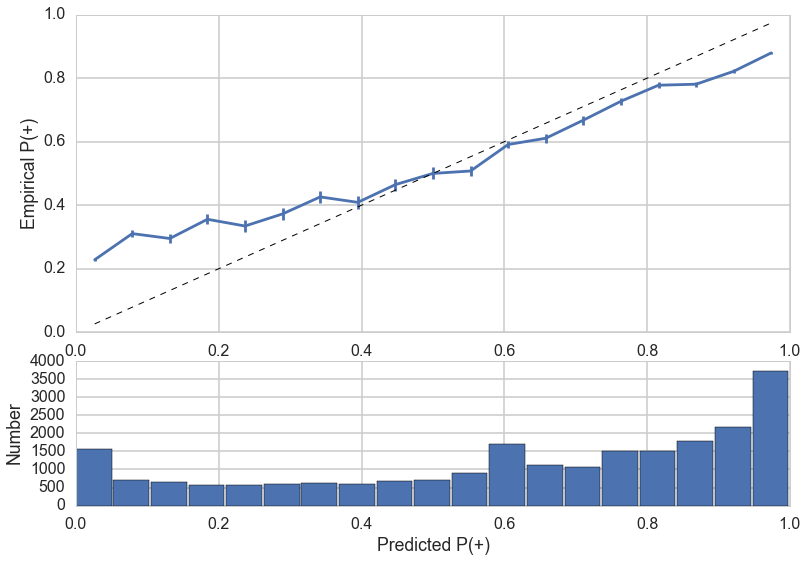

In [405]:
#your code here

#make vecotizer again for best
vectorizer = CountVectorizer(min_df=best_min_df)
X, Y = make_xy(X1, y1, vectorizer)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y)

#get clf
clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

calibration_plot(clf, xtest, ytest)

#Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print "Accuracy on training data: %0.2f" % (training_accuracy)
print "Accuracy on test data:     %0.2f" % (test_accuracy)

*your answer here*

Overall the new model is slightly less accurate on the test set than the training set (72% vs 75%, respectively). The model is is within or near 1 standard deviation of the expected prediction performance for prob > .4  and < .7. But the model is a bit overconfident for low P(+ predictions. Our calibration is decent as the spread of Predicted P(+) vs Number not super variable, but most of the counts are closer to 1.0 (also seen in the very small error bars on the plot). Histogram is a little bimodal, but still with highest counts near 1.0. 

## 4. Putting topics and sentiment analysis together

Now we have probabilities for which topic a sentence belongs to based on the nouns, and we have our Naive Bayes classifier which predicts the sentiment of a whole review based on its adjectives. We need to modify our sentiment analysis to work on the level of single sentences, like we did for the topic modeling. The basic idea is summed up in this diagram:

<img src="process.jpg" width=800 height=600/>

which shows a bunch of sentiments for the topics T0 and T1.

### Naive Bayes Probabilities

Our naive Bayes classifier computes $P(\text{class}\,|\,\text{review})$, where the _class_ is "whether the review is positive or negative" and the _review_ corresponds to a set of adjectives $\{\text{word}_1, \text{word}_2, \text{word}_3, ...\}$. 

According to Bayes theoreme we have:
$$P(\text{class}\,|\,\text{word}_1, \text{word}_2, ...) = \frac{P(\text{word}_1. \text{word}_2, ...\,|\,\text{class})P(\text{class})}{P(\text{word}_1, \text{word}_2, ...)}$$

Remember that the Naive Bayes classifier assumes conditional independence, i.e. it assumes that 

$P(\text{word}_1, \text{word}_2, ... \,|\, \text{class}) = P(\text{word_1}\,|\,\text{class}) \cdot P(\text{word_2}\,|\,\text{class}) \cdot ...$. 

This means that during training our classifier estimated $P(\text{word}_i \,|\, \text{class})$, so it is pretty straightforward to apply it to the words from single sentences instead of whole reviews. We have to be careful though, because sentences typically are much shorter than whole reviews this means that we need to re-calibrate our conditional probabilities.

#### 4.1 Obtain log-probabilities for the adjectives

We want to compute all the class-conditional probabilities $P(\text{word}_i \,|\, \text{class})$ for every word in our adjective vocabulary. Use the vectorizer's `get_feature_names` function and the Naive Bayes classifier's `feature_log_prob_` (see the docs for `MultinomialNB`) to create two dictionaries.  One dictionary is for $\log P(\text{word}_i \,|\, \text{class}=1)$ and the other is for $\log P(\text{word}_i \,|\, \text{class}=0)$. Call the first dictionary `logpositives` and the second one `lognegatives` respectively. Thus the keys are the words themselves and the values are the log-probabilities

Note that we are using the logarithm here. As we multiply probabilities, we can run into numerical problems if we have too many factors. In log space multiplications become sums and our computations is more stable. 


In [285]:
#your code here

#get words and probs
words = np.array(vectorizer1.get_feature_names())
probs = clf.feature_log_prob_

# and store them in the prob neg, pos dicts
logpositives = dict(zip(words,probs[1]))
lognegatives = dict(zip(words,probs[0]))


#### 4.2 Write a function to compute the probability that a sentence is positive.

We've calculated all the $P(\text{word}_i \,|\, \text{class}=1)$ and $P(\text{word}_i \,|\, \text{class}=0)$ above as logs. This has been done for all the adjectives in each review.

Now we wish to invert the question. We wish to ask: given a sentence $s$ of adjectives (since we stripped the nouns), whats the probability that this sentence is positive? 

We use Bayes theorem for this (+ is the class):

$$P(+\,|\,s) = \frac{P(s\,|\,+)P(+)}{P(s\,|\,+)P(+) + P(s\,|\,-)P(-)}$$

Using the Naive Bayes assumption we find for the adjectives $\text{word}_i$:

$$P(s\,|\,+) = \prod_i P(\text{word}_i\,|\,+) \implies log(P(s\,|\,+)) = \sum_i log(P(\text{word}_i\,|\,+))$$

Use these two formulae to write a function `calc_pplus` which takes 5 arguments: a list of adjectives `adjlist` constituting a sentence, a dictionary of logpositives `lp`, a dictionary of lognegatives `ln`, the prior probability of a review being positive `pp`, and the prior probability of a review being negative `pn`; and outputs $P(s\,|\,+)$. (The prior probabilities were calculated earlier in this notebook)

Here is the spec:
`def calc_pplus(adjlist, lp, ln, pp,pn)`

In [352]:
#your code here

def calc_pplus(adjlist, lp, ln, pp, pn):
    splus = 0
    sminus = 0
    
    #iterate through all the words. I know you can do array sums but i decided on this way
    for word in adjlist:
        if word in logpositives.keys():
            splus += lp[word]
        if word in lognegatives.keys():
            sminus += ln[word]
    splus = np.exp(splus)
    sminus = np.exp(sminus)
    
    #make calculation above
    pplus = (splus * pp)/(splus*pp + (sminus*pn))
    return pplus
        

#### Compute the topic for a sentence

Back to our LDA topics. First we do a sanity check. We obtain all the review ids, and check that the length of the `parseout` array is identical to that of the `reviews` array.

In [353]:
reviews=subdf.map(lambda r: r.review_id).collect()

In [354]:
len(parseout),len(reviews)

(91336, 91336)

We write a function `choose_topic` which chooses which of the two LDA topics (clusters) we ought to pick for a sentence, given the bag of words for that sentence. This simply uses the higher probability cluster to make a choice. Sometimes `get_document_topics` only outputs one cluster if the probability is overwhelmingly high. So we need to handle this case.

In [355]:
def choose_topic(ldamodel, bow):
    tee = lda2.get_document_topics(bow)
    if len(tee)==2:
        t1,t2=tee
        if t2[1] >= t1[1]:#get higher probability topic
            topicis=t2[0]
        else:
            topicis=t1[0]
    elif len(tee)==1:#if only one was provided its very high probability. Take it
        teetuple=tee[0]
        topicis=teetuple[0]
    return topicis


We now combine the functions `calc_pplus` and `choose_topic` in the loop below to obtain the sentence topic and calculate the sentiment of the sentence. Note how we use the length of the noun-list for each review from `parseout` to obtain the appropriate bag-of-words from our corpus. We store our output for each review in a dictionary with keys review-id and values a list of dictionaries, one for each sentence with the topic `topic` of the sentence and the probability `pplus` of it "being" or predicting positive. This loop will take a few minutes to run.

In [356]:
counter=0
reviewdict={}
for i, rid in enumerate(reviews):
    rlist=[]
    nlist, alist = parseout[i]
    ln=len(nlist)
    localbow=corpus[counter:counter+ln]
    for bow, adj, noun in zip(localbow, alist, nlist):
        doc=" ".join([id2word[e[0]] for e in bow])
        pplus=calc_pplus(adj, logpositives, lognegatives, priorp, priorn)
        topicis=choose_topic(lda2, bow)
        ldict={"topic": topicis, 'pplus':pplus}
        rlist.append(ldict)
    reviewdict[rid]=rlist
    counter=counter+ln


####  Create a dataframe with all of this information

We now write some Spark code to combine this dictionary with the original `subdf` dataframe to get a dataframe `completedf` which adds in the individual sentences for each review.

The function `extendit` takes a row from `subdf`, gets the `review_id`, uses it to lookup the `reviewdict` above, finds the list of sentence dictionaries there, makes a copy of the dictionaries, and augments them with information from `subdf`. So our output is a list of dicts, one for each sentence.

In [357]:
def extendit(row):
    outlist=[]
    revs=reviewdict[row.review_id]
    for r in revs:
        r2=r.copy()
        r2['business_id']=row.business_id
        r2['user_id']=row.user_id
        r2['review_id']=row.review_id
        r2['stars']=row.stars
        r2['user_avg']=row.user_avg
        outlist.append(r2)
    return outlist


We use Spark `flatMap` to create a huge list of dictionaries, one per sentence in the review, and then combine these into a Pandas (_not_ Spark) dataframe `completedf`

In [358]:
%%time
newdfin=subdf.flatMap(lambda r: extendit(r)).cache()

CPU times: user 31.2 s, sys: 2.76 s, total: 34 s
Wall time: 36.4 s


In [365]:
newdfin.take(2)

[{'business_id': u'KayYbHCt-RkbGcPdGOThNg',
  'pplus': 0.70681170336567378,
  'review_id': u'v_uEDbK5fP1UJpkXNPwXpQ',
  'stars': 4,
  'topic': 0,
  'user_avg': 3.6,
  'user_id': u'ay9H1RpjbBkaiXGxfh7LaA'},
 {'business_id': u'KayYbHCt-RkbGcPdGOThNg',
  'pplus': 0.751530104423349,
  'review_id': u'v_uEDbK5fP1UJpkXNPwXpQ',
  'stars': 4,
  'topic': 0,
  'user_avg': 3.6,
  'user_id': u'ay9H1RpjbBkaiXGxfh7LaA'}]

In [360]:
%%time
list_of_dicts=newdfin.collect()

CPU times: user 1.5 s, sys: 1.18 s, total: 2.68 s
Wall time: 1min 6s


In [363]:
completedf=pd.DataFrame(list_of_dicts)
completedf.head()

,business_id,pplus,review_id,stars,topic,user_avg,user_id
0,KayYbHCt-RkbGcPdGOThNg,0.706812,v_uEDbK5fP1UJpkXNPwXpQ,4,0,3.6,ay9H1RpjbBkaiXGxfh7LaA
1,KayYbHCt-RkbGcPdGOThNg,0.751530,v_uEDbK5fP1UJpkXNPwXpQ,4,0,3.6,ay9H1RpjbBkaiXGxfh7LaA
2,KayYbHCt-RkbGcPdGOThNg,0.718419,v_uEDbK5fP1UJpkXNPwXpQ,4,0,3.6,ay9H1RpjbBkaiXGxfh7LaA
3,KayYbHCt-RkbGcPdGOThNg,0.759349,v_uEDbK5fP1UJpkXNPwXpQ,4,0,3.6,ay9H1RpjbBkaiXGxfh7LaA
4,KayYbHCt-RkbGcPdGOThNg,0.737865,v_uEDbK5fP1UJpkXNPwXpQ,4,0,3.6,ay9H1RpjbBkaiXGxfh7LaA


We see this is a bigger dataframe:

In [364]:
completedf.shape

(463582, 7)

#### 4.3 Get the stats

We are now going to group by `review_id` and `topic` to calculate statistics on all the sentences that belong to a particular review, and to a particular topic: 

`completedf.groupby(['review_id', 'topic'])`

For each group in this group-by we will apply a function `get_stats` which takes the group as an argument and returns a one-row dataframe with columns:

- `min`: minimum value of column `pplus`
- `max`: maximum value of column `pplus`
- `rid`: restaurant_id for the review
- `uavg`: average user rating for user doing this review
- `count`: number of sentences
- `var`: variance of column `pplus` calculated with `ddof=1`. If the sample variance is NAN when there is only 1 sentence in a review (which happens quite often) set the variance to 0
- `mean`: the mean of the column `pplus`
- `stars`: the number of stars for the review.

Set the index of this one line dataframe to the restaurant id (`rid`).

What this function does is that it gives us review and topic specific statistics, computed on the sentences in the review.

The spec of this function is:

`def get_stats(group)`

In [401]:
#your code here

def get_stats(group):
    
    ##get all the desired variables from your group and put them in a dictionary
    tempdict['min'] = [group.pplus.min()]
    tempdict['max'] = [group.pplus.max()]
    tempdict['mean'] = [group.pplus.mean()]
    tempdict['rid'] = [group.business_id.iloc[0]]
    tempdict['uavg'] = [group.user_avg.iloc[0]]
    
    ## for nan case
    if group.pplus.count() == 1:
        tempdict['var'] = [0]
    else:
        tempdict['var'] = [group.pplus.var(axis=0, ddof=1)]
        
    tempdict['count'] = [group.business_id.count()]
    tempdict['stars'] = [group.stars.iloc[0]]
    
    ##make the dataframe and index it
    new_df = pd.DataFrame(tempdict)
    new_df = new_df.set_index("rid")
    return new_df

We now run the code on the `completedf`. The group-by will automatically concatenate these one-row dataframes for us. This is a slow function, taking about 5 mins on my computer.

In [398]:
%%time
dftouse=completedf.groupby(['review_id', 'topic']).apply(get_stats).reset_index()

CPU times: user 6min 34s, sys: 12.9 s, total: 6min 47s
Wall time: 6min 51s


We can see the shape of `dftouse` and what it looks like.

In [402]:
print dftouse.shape
dftouse.head()#note not all reviews will have both topics.

(149163, 10)


,review_id,topic,rid,count,max,mean,min,stars,uavg,var
0,---gFan7_-hicaSgAi86Hg,0,btay-zbv6GGEp6c3Wg2MSw,2,0.606558,0.586947,0.567336,3,3.333333,0.000769
1,---gFan7_-hicaSgAi86Hg,1,btay-zbv6GGEp6c3Wg2MSw,1,0.658944,0.658944,0.658944,3,3.333333,0.000000
2,--0MzHNy7MVBRvZCOAeRPg,0,4gLecengX1JeGILm7DwU3w,2,0.732857,0.636304,0.539750,5,3.829268,0.018645
3,--0MzHNy7MVBRvZCOAeRPg,1,4gLecengX1JeGILm7DwU3w,7,0.844504,0.639145,0.486184,5,3.829268,0.015209
4,--2XPEO58E9MOE4JFXEZeQ,0,dipzJ5BExpm6BtJ91mXd4Q,1,0.653809,0.653809,0.653809,4,4.500000,0.000000


And finally we save it. This ends the Spark part of the homework. Save the csv file, store it somewhere safe first, and only then shut down your Vagrant/AWS cluster/Spark.

In [403]:
dftouse.to_csv("dftouse.csv", index=False)

Include `dftouse.csv` in your homework submission. Q5 is in `hw5part2.ipynb`.